In [ ]:
# Run this cell if you don't have the following libraries installed
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install scipy 
!pip3 install imbalanced-learn



In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

# Task 1

When I did this task I ran into some issues dowloading the dataset. After a few minutes I realized that the newest version of xlrd was no longer compatible with .xls files so I decided to change the format of the file to .xlsx to load it. I decided to do since I was struggling to download an old version of xlrd. 

In [337]:
df = pd.read_excel("titanic3.xlsx")

Using describe() was very commmon in our other courses, so I dedicided to give it a try to get a few details of the dataframe (count, mean, min/max, etc)

In [338]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


After getting the results of describe(), I realized that it isn't that helpful so I decided to use another method info(). 

In [339]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


This method was more helpful since it helped me with a bit more information about the dataset. We know now that there are 1309 entries, which is a manageable amount of data to practice ML. We also know that there are 14 columns per entry of which 7 are categorical (which we will have to encode later on) and 7 are numerical. It also provides information about the null values present in each column. Since we have 1309 entires then pclass, survived, name, sex, sibsp, parch, and ticket columns are the only ones that have no missing values. We will just keep in this in mind for now and address this in the next task.

Now I will move on to some visualizations for numerical columns. 

[[<Axes: title={'center': 'pclass'}> <Axes: title={'center': 'survived'}>
  <Axes: title={'center': 'age'}>]
 [<Axes: title={'center': 'sibsp'}> <Axes: title={'center': 'parch'}>
  <Axes: title={'center': 'fare'}>]
 [<Axes: title={'center': 'body'}> <Axes: > <Axes: >]]


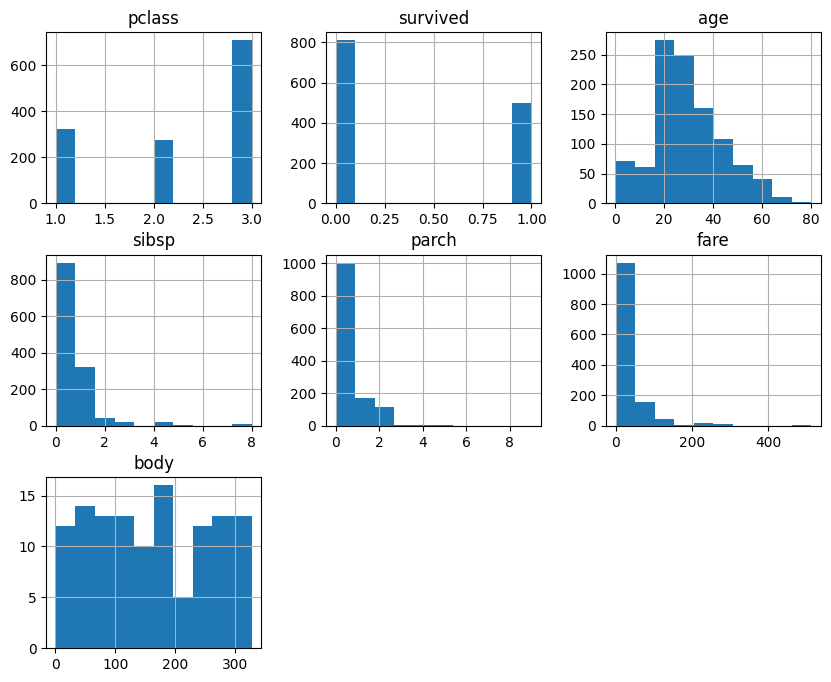

In [340]:
print(df.hist(figsize=(10,8)))

So these histograms gives us a quick insight on each of the columns. For the pclass column it is clear that there much more people from the third class than the first and second classes. The survived column tells us that there are about 800 people that didn't survive, which is much more than those approximately 500 that did. As we previously saw with describe(), passengers' mean age was around 29-30. This means that there were more young adults and kids than there were old adults (right skewed). Majority of the passengers didn't have any companions on-board, some had one companion (probably spouses), and very few had families on-board (few outliers). Again, the enxt histogram tells us that majority of passengers did not have any parents or children on-board. Majority of passengers paid low fares, which we already knew since majority of passengers were traveling in third class, still, there a few who paid much more. Finally, the last histogram is not relevant since this is the column that just tells us the number of the found bodies. 


These histograms provided useful information about skewness and outliers, which we will have to deal with in later tasks. Nevertheless, the histograms provided information on individual variables. Now I want to get information on relationships, specifically the survival rates across the different numerical columns. I will use a barplot for easy analysis. 

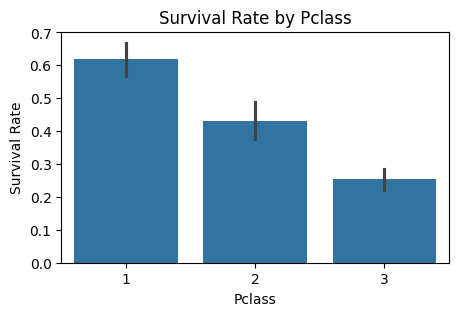

In [341]:
plt.figure(figsize =(5,3))
sns.barplot(x="pclass", y="survived", data=df)
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass")
plt.show()

In [342]:
# I will create a copy to avoid modifying the original dataset since I am just exploring for now
df_copy = df.copy()

pclass_counts = df_copy.groupby('pclass')['survived'].agg(['count', 'mean'])
print(pclass_counts)

        count      mean
pclass                 
1         323  0.619195
2         277  0.429603
3         709  0.255289


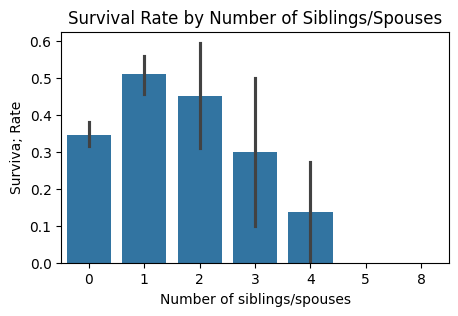

In [343]:
plt.figure(figsize =(5,3))
sns.barplot(x="sibsp", y="survived", data=df)
plt.xlabel("Number of siblings/spouses")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.show()

In [344]:
sibsp_counts = df_copy.groupby('sibsp')['survived'].agg(['count', 'mean'])
print(sibsp_counts)

       count      mean
sibsp                 
0        891  0.346801
1        319  0.510972
2         42  0.452381
3         20  0.300000
4         22  0.136364
5          6  0.000000
8          9  0.000000


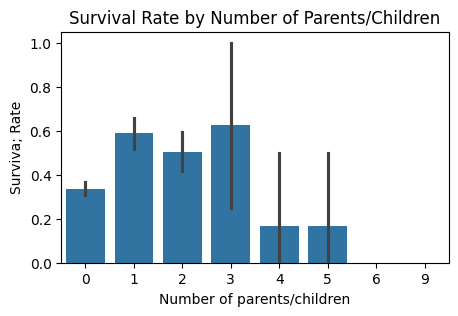

In [345]:
plt.figure(figsize =(5,3))
sns.barplot(x="parch", y="survived", data=df)
plt.xlabel("Number of parents/children")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Parents/Children")
plt.show()

In [346]:
parch_counts = df_copy.groupby('parch')['survived'].agg(['count', 'mean'])
print(parch_counts)

       count      mean
parch                 
0       1002  0.335329
1        170  0.588235
2        113  0.504425
3          8  0.625000
4          6  0.166667
5          6  0.166667
6          2  0.000000
9          2  0.000000


The most relevant relationship I found was the survival rate by class. As one could've guessed, the survival rate in the first class is much higher than the one in the third class. The barplot shows a clear relationship, the higher the class the higher the survival rate. While the survival rate of those passengers in the first class is about 60%, the survival rate of those passengers in the second class is less than 30%... crazy! Knowing that there are much more passengers from the third class in the dataset, it is intuitive that not many passengers survived.
 
 Additionally, I also decided to visualize the survivial rate by number of siblings/spouses. The results seem to make sense since being completely alone had a lower surival rate than having one companion on-board, and having more that 1 companion decreased the surivival rate. 
  
This goes hand in hand with the relationship with the number of parents/children. Most passengers had 0 to 2 parents/children on board, and even though the graph shows that the survival rate increased when the number of parch was 3 we need to consider that this was the case for only 8 passengers. Therefore, we can once again conclude that having 1 companion gave passengers more chance to survive than being alone but having more that 1 companion decreased their chances.

I want to further analyze the relationships with the other relevant columns so we have to find a way to group the data and graph it. We will graph the relationships between survival rate and age and fare since the relationhsip with found bodies is not relevant.

/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/3106331604.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df_copy.groupby('age_group')['survived'].mean()


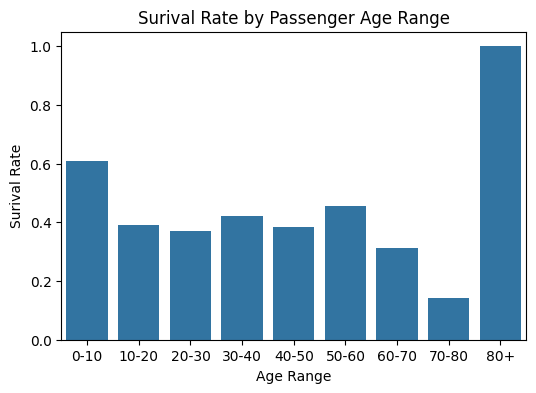

In [347]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, df['age'].max() + 1]
age_ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df_copy['age_group'] = pd.cut(df_copy['age'], bins=age_bins, labels=age_ranges, right=False)

age_survival_rate = df_copy.groupby('age_group')['survived'].mean()

plt.figure(figsize =(6,4))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)

plt.title("Surival Rate by Passenger Age Range")
plt.xlabel("Age Range")
plt.ylabel("Surival Rate")

plt.show()


It seems odd that kids have such a high survival rate and that elderly have a 100% of survival rate, so I want to check how many passengers fall in each age group. This is helpful because if there were 5 people that were 80+ years old and all 5 happened to survive then of course the survival rate is going to be 100%. (I will also go back to the previous plots and add the count per section as well)

In [348]:
age_group_counts = df_copy.groupby('age_group')['survived'].agg(['count', 'mean'])
print(age_group_counts)

           count      mean
age_group                 
0-10          82  0.609756
10-20        143  0.391608
20-30        344  0.369186
30-40        232  0.422414
40-50        135  0.385185
50-60         70  0.457143
60-70         32  0.312500
70-80          7  0.142857
80+            1  1.000000


/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/4253456302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_copy.groupby('age_group')['survived'].agg(['count', 'mean'])


The results make the graph much more clear. I made an assumption earlier that kids had a lower change of survival but even though the sample is still small, 82, it make sense that babies/kids had a higher survival rate since their safety was probably prioritized. Additionally, we should disregard the age group 80+ since there is only one sample. 
In conclusion, there seems to be a relationship between age and survival rate, yet, it is a non-linear relationship. Kids/babies had a higher chance of survival, elderly had a lower chance of survival, while middle-aged passengers had a survival rate between ~37% and ~ 46%. The sample sizes per age group are small so we should be careful drawing strict conclusions.

Now moving on with graphing the relationship between survival rate and fares. Hopefully there is a relationship similar to the one we got with passenger classes since fare prices determine the class. We will also print the number of passengers in each fare range to be able to anaylze accordingly.

In [349]:
# First I need to find min and max fares to know how to split the bins

min_fare = df['fare'].min()
max_fare = df['fare'].max()

print("Min Fare:", min_fare)
print("Max Fare:", max_fare)

Min Fare: 0.0
Max Fare: 512.3292


/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/2788372364.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = df_copy.groupby('fare_group')['survived'].mean()


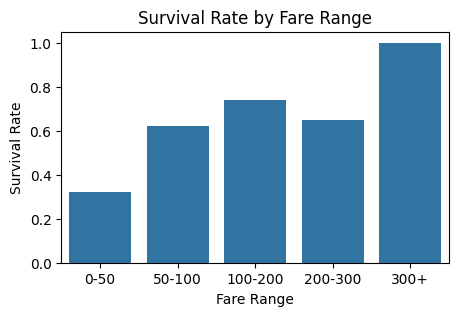

In [350]:
# Now that we know the min and max we can split the bins accordingly

fare_bins = [0, 50, 100, 200, 300, 512.33]
fare_ranges = ['0-50', '50-100', '100-200', '200-300', '300+']


df_copy['fare_group'] = pd.cut(df_copy['fare'], bins=fare_bins, labels=fare_ranges, right=False)

fare_survival_rate = df_copy.groupby('fare_group')['survived'].mean()


plt.figure(figsize=(5, 3))
sns.barplot(x=fare_survival_rate.index, y=fare_survival_rate.values)
plt.title("Survival Rate by Fare Range")
plt.xlabel("Fare Range")
plt.ylabel("Survival Rate")

plt.show()


In [351]:
fare_group_counts = df_copy.groupby('fare_group')['survived'].agg(['count', 'mean'])
print(fare_group_counts)

            count      mean
fare_group                 
0-50         1066  0.320826
50-100        158  0.620253
100-200        46  0.739130
200-300        34  0.647059
300+            4  1.000000


/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/1676248467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_counts = df_copy.groupby('fare_group')['survived'].agg(['count', 'mean'])


Based on the results it seems that there is a positive relationship between fare range and survival rate (which is what we expected!), except that the fare range between 200 and 300 has a higher survival rate that the fare range between 100 and 200. Again, the sample sizes are small so we shouldn't draw strict conclusions. 

Now moving on the categorical columns, we will graph the relationship between survival rate and sex and embarked.

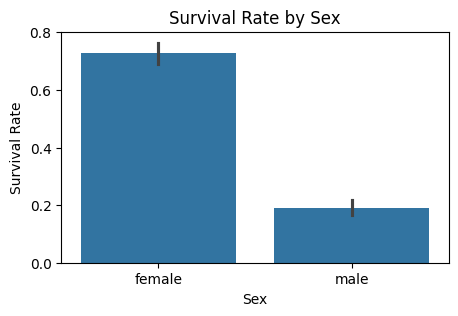

In [352]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df['sex'], y=df['survived'])

plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

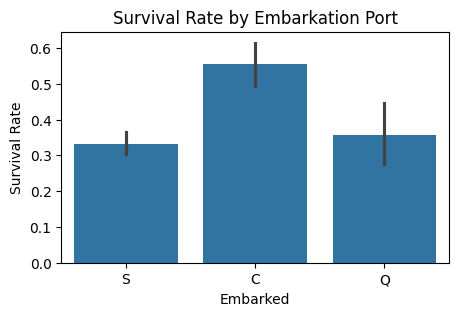

In [353]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df['embarked'], y=df['survived'])

plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked')
plt.show()

## Task 1 Summary

Numerical parameters 

- survival rate vs pclass --> the higher the class (1, being the highest and 3 being the lowest), the higher the survival rate

- survival rate vs age --> non-linear relationship, kids/babies have the highest survival rate 

- surival rate vs sibsp --> having 1 companion increases your chances of survival from 0 companions, but having more than one decreases it. 

- surival rate vs parch --> having 1 companion increases your chances of survival from 0 companions, but having more than one decreases it (in the graph it shows that having 3 companions has the highest survival rate but the sample size is very small)

- survival rate vs fare --> positive relationship, the higher the fare, the higher the chances of survival

Categorical parameters
- survival rate vs sex --> females had almost 4 times the chance that males had at surving.
- survival rate vs embarked --> passengers that embarked in port C had a higher chance of survial rate while S and Q had similar survival rates.

# Task 2 and 5

When I used info() it already provided me with the number of non-null values per column, but we can further analyze this to get a clearer idea of the missing values. We will now use isnull() and sum() so we get the number of missing values instead of having to subtract the non-null values from the total number of entries per column.

In [354]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


The isnull() function now clearly states the number of null values per column. As we already knew, there are 7 columns that have null values. The columns that have the most missing values are the cabin and, boat, and body columns. This makes sense since most passengers that were assigned cabins belonged to the first class (so missing cabin likely refer to third class passengers), only survivors had boats, and only non-survivors had bodies to be found. To further analyze what strategy to use for the missing values it will be useful to know the percentage of missing values per column.

In [355]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage[missing_values_percentage > 0])

age          20.091673
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


Considering there are several strategies that could be applied to handle missing values and that there is no way of knowing which is the best technique until after model validation, we have to make an educated guess by anaylzing the previous data anaylysis be made of each column. 

Before doing that I want to think about wether or not we should drop or not the columns with missing values. 
- age: This column is relevant due to a possible relationship with survival rate as we saw before in task #1. Therfore, we should not drop this column. 

- fare: This column is relevant due to a possible relation but it does go hand in hand with pclass so maybe it is a bit redundant. We can keep for now.

- cabin: This column is relevant since the cabin probably tells us the class the passengers belonged too, but again it could be redundant. It would be more helpful if we had more information on where the cabins were located. Addtionally, 77% of the entries are missing so we can drop it.

- embarked: This column could give us further insights and there not even 1% of missing values so we can keep it for now.

- boat: This columns is not relevant since the survival column already tells us if the passenger survived, and since boats are only for those who survived it won't help us. We should drop it.

- body: Again, this column is not relevant. If a passenger's body is found it won't help us determine if a passenger will survive or not. We should drop it. 

- home.dest: There is little potential this is helpful and there's almost 50% of the data missing. I'm going to take a chance and drop it. 




In [356]:
def drop_columns_if_exist(df, columns):
    columns_to_drop = [col for col in columns if col in df.columns]  
    if columns_to_drop:  
        df.drop(columns=columns_to_drop, inplace=True)
    return df  


df = drop_columns_if_exist(df, ['cabin', 'boat', 'body', 'home.dest'])


Now that I analyzed the columns that I can drop I can move on to data imputation (Quick Note: if the data was much larger, we could consider getting rid of the entries(rows) with missing values. But, our dataset is not only not large enough, but some of the columns are meant to have missing values, like the body and boat columns. That's why I will drop those columns but keep the rest of the entries). 

- age: The distribution across age in this dataset follows an approximate normal distibution (according to the graph in task #1). Therefore, I believe that a good data imputation technique would be using the mean or median. I prefer the median because it's more robust to outliers, ensuring that extreme values don’t skew the imputed age. 

- fare: Considering that most passengers paid low fares, making it right skewed, it will also be better to use the median. 

- embarked: Since this column is categorical, we can't use the techniques we've been looking at. Nevertheless, considering that there are few missing values, we can just use the mode to fill in. 

- home.dest: This is another categorical column, so we can also use the mode. 

Before applying the strategies mentioned above, it is better to first complete Task #5 (data splitting). The reason behind this decision is to prevent data leakage. If I impute missing values, like mean or median, before splitting, these values would be calculated based on the entire dataset, including data from the test and validation sets. This would provide the model with information that it would never have in the real-world during training. By splitting first, I ensure that imputation is done only on the training set; this prevents overfitting. 

Considering that the dataset is not large, I will split the data into 70% for training and 30% between validation and test data in the first split. This will help me have enough data to train the model and be able to generalize to unseen data. 

In [357]:
from sklearn.model_selection import train_test_split # I used this library as it was recommended 

X, Y = df.drop(columns=['survived']), df['survived']

# first reccomended split
X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

#second reccomended split 
X_val, X_test, Y_val, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state=42, stratify=Y_other)

# now I will just check the dimensions of each split 
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (916, 9)
X_val shape: (196, 9)
X_test shape: (197, 9)


I want to make sure that the split was done correctly, so I will check that there are no duplicated rows throught the different datasets.

In [358]:
print("Overlap between Train and Validation:", X_train.index.intersection(X_val.index).shape[0])
print("Overlap between Train and Test:", X_train.index.intersection(X_test.index).shape[0])
print("Overlap between Validation and Test:", X_val.index.intersection(X_test.index).shape[0])


Overlap between Train and Validation: 0
Overlap between Train and Test: 0
Overlap between Validation and Test: 0


We're good! Since the results was 0 for all of them then that means that there are no duplicates, no data leakage. 

Additionally, I will double check that the datasets are representative of the original distribution using stratification. 

In [359]:
def check_class_distribution(y, df):
    distribution = Y.value_counts(normalize=True) * 100  
    print(f"\n{df} Class Distribution:\n{distribution}")

# Check distribution in the original dataset
check_class_distribution(Y, "Original Dataset")

# Check distributions in the split sets
check_class_distribution(Y_train, "Training Set")
check_class_distribution(Y_val, "Validation Set")
check_class_distribution(Y_test, "Test Set")



Original Dataset Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

Training Set Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

Validation Set Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

Test Set Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64


Luckily, the results show that the original dataset's distribution has been mantained across the training, validation, and test sets. The splitting process was done correctly!

Now that that the data has been split and checked, I can continue with the rest of task #2, data imputation. I was going to manually find the values that I mentioned before to input them into the data, but SimpleImputer from sklearn.impute library apparently can quickly provide these values. So I will try it out. 

In [360]:
from sklearn.impute import SimpleImputer

#numerical columns (qge and fare)
age_imputer = SimpleImputer(strategy='median')
fare_imputer = SimpleImputer(strategy='median')

X_train['age'] = age_imputer.fit_transform(X_train[['age']]).ravel()
X_train['fare'] = fare_imputer.fit_transform(X_train[['fare']]).ravel()

X_val['age'] = age_imputer.transform(X_val[['age']]).ravel()
X_val['fare'] = fare_imputer.transform(X_val[['fare']]).ravel()

X_test['age'] = age_imputer.transform(X_test[['age']]).ravel()
X_test['fare'] = fare_imputer.transform(X_test[['fare']]).ravel()

#  categorical columns (embarked)
embarked_imputer = SimpleImputer(strategy='most_frequent')

X_train['embarked'] = embarked_imputer.fit_transform(X_train[['embarked']]).ravel()

X_val['embarked'] = embarked_imputer.transform(X_val[['embarked']]).ravel()

X_test['embarked'] = embarked_imputer.transform(X_test[['embarked']]).ravel()



In [361]:
# Quickly checking that there are no null values

print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_val:\n", X_val.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64
Missing values in X_val:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64
Missing values in X_test:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


# Task 3

Once again, let's find the categorical columns in out dataset

In [362]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')


Even though there are 5 columns identified as categrical, I'm not going to encode all of them since not all columns are relevant. I will be focusing on sex, embarked, and pclass which is originally a numerical column in the dataset but represent a categorical feature in reality. Additionally, I will be dropping the name and ticket features as they are not relevant. 

In [363]:
# function to drop columns if they exist so that they dont ouput error if ran twice
def drop_columns_if_exist(df, columns):
    columns_to_drop = [col for col in columns if col in df.columns]  
    if columns_to_drop:  
        return df.drop(columns=columns_to_drop)
    return df 


X_train = drop_columns_if_exist(X_train, ['name', 'ticket'])
X_val = drop_columns_if_exist(X_val, ['name', 'ticket'])
X_test = drop_columns_if_exist(X_test, ['name', 'ticket'])

In [364]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['sex', 'embarked', 'pclass']

# 'ignore' will help us with categories not seen in training set
encoder = OneHotEncoder(drop=None, handle_unknown='ignore')

# new df to be safe 
encoded_data = encoder.fit_transform(X_train[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# training set
X_train_encoded = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_encoded, encoded_df], axis=1)

# new df to be safe 
encoded_val = encoder.transform(X_val[categorical_cols]).toarray()
encoded_val_df = pd.DataFrame(encoded_val, columns=encoder.get_feature_names_out(categorical_cols))

# validation set
X_val_encoded = X_val.drop(columns=categorical_cols).reset_index(drop=True)
X_val_encoded = pd.concat([X_val_encoded, encoded_val_df], axis=1)

# new df to be safe 
encoded_test = encoder.transform(X_test[categorical_cols]).toarray()
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_cols))

# test set
X_test_encoded = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_encoded, encoded_test_df], axis=1)



During the encoding process I ran into some issues. I was getting a ValueError when transforming the validation and test sets because the encoder was encountering categories in those sets that it had never seen during training. The error said something between the lines that there were NaN values (I freaked out becuase I tripled check during the data imputation process). So, I checked again for NaN values in the sets, and none of them had null values. Naturally, I had to ask ChatGPT what was going on. It turns out that the issue wasn't with the NaN values themselves, but rather that the encoder had encountered unseen categories, like NaN, during the transformation process. ChatGPT suggested I use the handle_unknown='ignore' parameter, which tells the encoder to ignore any unseen categories and handle them without causing errors. After applying this, I was able to successfully transform the validation and test sets without further issues

Now let's take a look at the effect the encoding had.

In [365]:
# As a reminder, this is how the categorical features used to look
print(X_train[categorical_cols].sample(5, random_state=39))  


        sex embarked  pclass
28   female        S       1
311  female        S       1
294    male        C       1
148    male        S       1
219    male        C       1


In [366]:
# Now, this is how they look after the encoding process
print(X_train_encoded.head(5))

    age  sibsp  parch     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0  54.0      0      1  77.2875         0.0       1.0         0.0         0.0   
1  28.0      1      0  14.4542         0.0       1.0         1.0         0.0   
2  13.0      4      2  31.3875         0.0       1.0         0.0         0.0   
3  28.5      0      0  16.1000         0.0       1.0         0.0         0.0   
4  55.5      0      0   8.0500         0.0       1.0         0.0         0.0   

   embarked_S  pclass_1  pclass_2  pclass_3  
0         1.0       1.0       0.0       0.0  
1         0.0       0.0       0.0       1.0  
2         1.0       0.0       0.0       1.0  
3         1.0       0.0       0.0       1.0  
4         1.0       0.0       0.0       1.0  


In [367]:
print(encoder.categories_)


[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object), array([1, 2, 3])]


# Task 4

First, let's find the numerical columns.

In [368]:
numerical_cols_list = X_train.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols_list)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


We can't forget that we decided to treat pclass as a categorical variable, so we're going to define the numerical columns without pclass.

In [369]:
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

### Standardization

In [385]:
from sklearn.preprocessing import StandardScaler  # recommended library

scaler = StandardScaler()

# training set
X_train_standardized = X_train_encoded.copy()
X_train_standardized[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# results
print("Standardized training set (numerical columns):")
print(X_train_standardized[numerical_cols].head())

# validation set
X_val_standardized = X_val_encoded.copy()
X_val_standardized[numerical_cols] = scaler.transform(X_val[numerical_cols])
#results 
print("\nStandardized validation set (numerical columns):")
print(X_val_standardized[numerical_cols].head())

# test set
X_test_standardized = X_test_encoded.copy()
X_test_standardized[numerical_cols] = scaler.transform(X_test[numerical_cols])
# resulsts
print("\nStandardized test set (numerical columns):")
print(X_test_standardized[numerical_cols].head())


Standardized training set (numerical columns):
        age     sibsp     parch      fare
0  1.917440 -0.487688  0.691284  0.905927
1 -0.112638  0.525287 -0.441482 -0.366777
2 -1.283836  3.564212  1.824050 -0.023788
3 -0.073598 -0.487688 -0.441482 -0.333441
4  2.034560 -0.487688 -0.441482 -0.496495

Standardized validation set (numerical columns):
        age     sibsp     parch      fare
0 -0.346877  0.525287 -0.441482 -0.502065
1 -0.815357 -0.487688 -0.441482 -0.504597
2 -0.034558 -0.487688 -0.441482 -0.467125
3 -0.112638 -0.487688 -0.441482  0.353212
4 -0.346877 -0.487688 -0.441482 -0.659550

Standardized test set (numerical columns):
        age     sibsp     parch      fare
0 -0.424957  0.525287  1.824050  0.657041
1 -0.346877  0.525287 -0.441482 -0.502065
2  1.214721 -0.487688  1.824050 -0.051893
3  0.590082  1.538262 -0.441482 -0.499027
4 -0.581117 -0.487688 -0.441482 -0.513121


### Normalization

The slides provided by the professor mentioned that it can be beneficial to apply winsorization to handle outliers so it could be good practice to use it before normalizing the datasets.

In [371]:
# This will help us see if there are any changes after winsorization
print("Original numerical columns (before Winsorization):")
print(X_train[numerical_cols].head())

Original numerical columns (before Winsorization):
       age  sibsp  parch     fare
306   54.0      0      1  77.2875
927   28.0      1      0  14.4542
642   13.0      4      2  31.3875
1294  28.5      0      0  16.1000
1015  55.5      0      0   8.0500


In [386]:
from scipy.stats.mstats import winsorize

def apply_winsorization(df, columns, limits=[0.05, 0.05]):
    for column in columns:
        df[column] = winsorize(df[column], limits=limits)
    return df


X_train_winsorized = apply_winsorization(X_train_encoded.copy(), numerical_cols)
X_val_winsorized = apply_winsorization(X_val_encoded.copy(), numerical_cols)
X_test_winsorized = apply_winsorization(X_test_encoded.copy(), numerical_cols)

# results 
print("\nNumerical columns after Winsorization:")
print(X_train_winsorized[numerical_cols].head())


Numerical columns after Winsorization:
    age  sibsp  parch     fare
0  54.0      0      1  77.2875
1  28.0      1      0  14.4542
2  13.0      2      2  31.3875
3  28.5      0      0  16.1000
4  54.0      0      0   8.0500


We can see very slight changes with the results. Nevertheless, it makes sense since there weren't any crazy outliers in the dataset. We can now move on to normalizing the data. 

In [387]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the training set
X_train_normalized = X_train_winsorized.copy()
X_train_normalized[numerical_cols] = scaler.fit_transform(X_train_winsorized[numerical_cols])

# Normalize the validation set
X_val_normalized = X_val_winsorized.copy()
X_val_normalized[numerical_cols] = scaler.transform(X_val_winsorized[numerical_cols])

# Normalize the test set
X_test_normalized = X_test_winsorized.copy()
X_test_normalized[numerical_cols] = scaler.transform(X_test_winsorized[numerical_cols])

# Print the data after normalization
print("\nNumerical columns after normalization:")
print(X_train_normalized[numerical_cols].head())


Numerical columns after normalization:
        age  sibsp  parch      fare
0  1.000000    0.0    0.5  0.621259
1  0.434783    0.5    0.0  0.064103
2  0.108696    1.0    1.0  0.214254
3  0.445652    0.0    0.0  0.078697
4  1.000000    0.0    0.0  0.007315


So, we applied both standardization and normalization. 

Standardization usually works better for data that is uniformly distributed because it rescales the feature values so that the sample mean equals 0 and the sample standard deviation is 1. On the other hand, normalization often works better for normally distributed data. Ii baiscally compresses the features values (it assumes max and min are outliers) so that the range between the values is small. That's why it helps hanlding the effect that extreme outliers can have. Unfortunetly, data is complicated and it rarely follows a strict distribution so it is difficult to know which works best for your data until you test it. 

# Task 6

In [374]:
from imblearn.over_sampling import SMOTE, ADASYN #recommended library
from collections import Counter

Fist, I will printing the current distribution of classes in the training data to better understand results afterwards since we will be able to compare them. Then, I will apply both SMOTE and ADASYN to learn the different effects.

In [388]:
print("Before SMOTE and ADASYN:", Counter(Y_train))


Before SMOTE and ADASYN: Counter({0: 566, 1: 350})


The results show that the majority class is 0 with 566 instances and the minority class is 1 with 350 instances. 

### SMOTE

In [389]:
smote = SMOTE(random_state=42)
X_train_SMOTE, Y_train_SMOTE = smote.fit_resample(X_train_encoded, Y_train)

# results
print("After SMOTE:", Counter(Y_train_SMOTE))

After SMOTE: Counter({0: 566, 1: 566})


### ADASYN

In [390]:
adasyn = ADASYN(random_state=42)

X_train_ADASYN, Y_train_ADASYN = adasyn.fit_resample(X_train_encoded, Y_train)


print("After ADASYN:", Counter(Y_train_ADASYN))

After ADASYN: Counter({0: 566, 1: 511})


Results showed that SMOTE balanced the data perfectly, creating enough synthetic "copies" of the minority class so that both end up in 566 each. On the hand, ADASYN was able to randomly add a bunch of samples as well, but not enough as SMOTE. Both approaches have their pros/cons; SMOTE perfectly balances the data but risks overfitting and ASDASYN avoids overfitting, works well with complex instances, but does not perfectly balances the data.

# Task 7

In [391]:
# let's list all variances
variances = X_train_ADASYN.var()

# I will sort it because there are serveral similar variances
sorted_variances = variances.sort_values()
print(sorted_variances)

embarked_Q       0.085994
embarked_C       0.161404
pclass_2         0.164689
pclass_1         0.183717
embarked_S       0.206551
sex_female       0.229224
sex_male         0.229224
pclass_3         0.244931
parch            0.703831
sibsp            0.867348
age            163.279439
fare          2296.264844
dtype: float64


I Googled the optimal threshold for featire selection and it basically said that it depends on our dataset and what we're looking to do with it. Nevertheless, a website mentioned something intuitive, the greater the threshold the more features that will be removed. Therefore I have decided to go with a common threshold, 0.01.

In [392]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01  
filter = VarianceThreshold(threshold) #found this class that removes the features with variances that are lower that the threshold
X_train_selection = filter.fit_transform(X_train_ADASYN)



selected_features = X_train_ADASYN.columns[filter.get_support()]

# results
print("Selected Features after low variance filtering:", selected_features)


Selected Features after low variance filtering: Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')


Based on the results, there was only one feature that had a variance lower than 0.01, embarked_Q. So, we will eliminate it. It is possisble that we may have to change the threshold in the future since most of the features were kept. Nevertheless, since so many features have very similar variances I figured that they could all be relevant and we won't know until we test the model. So, we will keep the threshold for now.

In [402]:
# I have to do this so that there is no error when running the cell and the variables names work later on
def drop_column_if_exists(df, column_name):
    if column_name in df.columns:
        return df.drop(columns=[column_name])
    return df  # Return unchanged if column doesn't exist

# I will use ADASYN for now
X_train_selection = drop_column_if_exists(X_train_ADASYN, 'embarked_Q')

# I will choose to use the normalized data for now 
X_val_selection = drop_column_if_exists(X_val_normalized, 'embarked_Q')
X_test_selection = drop_column_if_exists(X_test_normalized, 'embarked_Q')

To quickly identify correlations between features I will create a heatmap. Then, I will decide on a threshold and identify the features that are highly correlated. In this case, I would rather manually select the features that I want to remove since sometimes some highly correlated features make sense that they are part of the data.

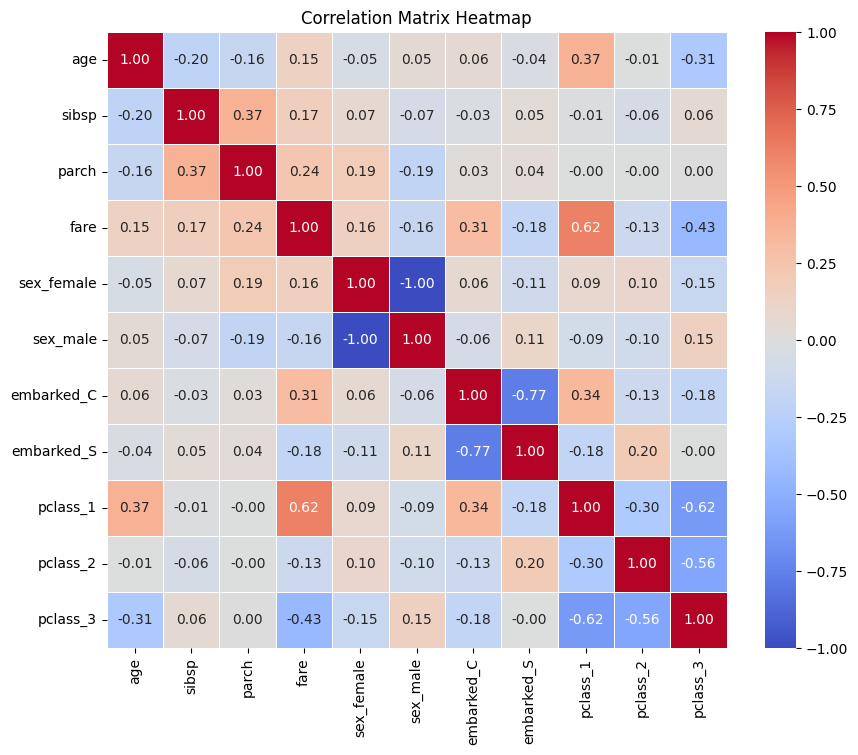

In [403]:
correlation_matrix = X_train_selection.corr()

plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

As expected, there are a few highly correlated features that shouldn't be removed. For example, each feature is perfectly correlated with itself, and 'female' and 'male' are highly correlated, as are the different embarking ports and the class variables. These correlations are expected and should not be removed.

Other than these obvious correlations, I don't find any extremely high correlations between the features. This suggests that a moderate threshold, like 0.6, might be a good choice for identifying unnecessary correlations. I'll now list pairs of features that have a correlation score between 0.6 and 0.7.

Why this range? Well, as I mentioned, the only high correlations are the ones that make sense. The highest correlation I could find is 0.77, but there are no other correlations that are above 0.7. I can, however, find a few pairs with correlations around 0.6 , which is why I'm setting the threshold to this range. Besides, lowering the threshold to 0.5 I believe is too risky since we may be getting rid of valuable features.

In [404]:
# threshold
lower_threshold = 0.6
upper_threshold = 0.7

correlation_matrix = X_train_selection.corr()

correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if lower_threshold <= abs(correlation_matrix.iloc[i, j]) < upper_threshold:
            correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# results
print(f"Highly correlated feature pairs with correlation between {lower_threshold} and {upper_threshold}:")
for pair in correlation_pairs:
    print(f"{pair[0]} and {pair[1]} have correlation of {pair[2]}")


Highly correlated feature pairs with correlation between 0.6 and 0.7:
pclass_1 and fare have correlation of 0.616372288927948
pclass_3 and pclass_1 have correlation of -0.6221709252695036


So, apparently there is only one pair that shows a moderate correaltion: pclass_1 and fare (I'm going to disregard pclass_3 and pclass_1). This is okay, it's actually good news. Our features are not highly correlated! Still, there may be a chance we have to come back and slighly decrease the threshold even more, but it is unlikely. 

For now, I won't even remove the pair just yet. Their correlation is moderate and they are relevant features in the dataset. I will consider getting them removed depending on the model performance later on.

• Why do we carry out tasks 6 and 7 after splitting the dataset into training, validation, and test sets? Could
we have conducted them on the entire dataset instead? Please elaborate on your answer 

# Task 8

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selection, Y_train_ADASYN)

Y_val_pred = logreg.predict(X_val_selection)

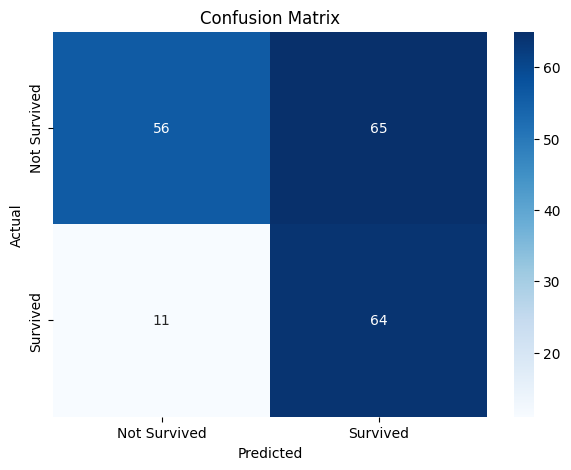

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.60       121
           1       0.50      0.85      0.63        75

    accuracy                           0.61       196
   macro avg       0.67      0.66      0.61       196
weighted avg       0.71      0.61      0.61       196



In [407]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_val, Y_val_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# resulst
print("Classification Report:")
print(classification_report(Y_val, Y_val_pred))

